In [1]:
import tensorflow as tf
from IPython.display import Image, display

import matplotlib.pyplot as plt
import tensorflow_hub as hub

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

--2022-12-31 23:15:11--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 137.15M  45.4MB/s    in 3.0s    

2022-12-31 23:15:14 (45.4 MB/s) - ‘train.zip’ saved [143812152/143812152]

--2022-12-31 23:15:14--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip’

validation.zip      100%[===========

In [4]:
!mkdir beans

In [5]:
!unzip train.zip -d beans/
!unzip test.zip -d beans/
!unzip validation.zip -d beans/

Archive:  train.zip
   creating: beans/train/
   creating: beans/train/healthy/
   creating: beans/train/angular_leaf_spot/
   creating: beans/train/bean_rust/
  inflating: beans/train/healthy/healthy_train.265.jpg  
  inflating: beans/train/healthy/healthy_train.271.jpg  
  inflating: beans/train/healthy/healthy_train.259.jpg  
  inflating: beans/train/healthy/healthy_train.99.jpg  
  inflating: beans/train/healthy/healthy_train.311.jpg  
  inflating: beans/train/healthy/healthy_train.66.jpg  
  inflating: beans/train/healthy/healthy_train.72.jpg  
  inflating: beans/train/healthy/healthy_train.305.jpg  
  inflating: beans/train/healthy/healthy_train.339.jpg  
  inflating: beans/train/healthy/healthy_train.113.jpg  
  inflating: beans/train/healthy/healthy_train.107.jpg  
  inflating: beans/train/healthy/healthy_train.106.jpg  
  inflating: beans/train/healthy/healthy_train.112.jpg  
  inflating: beans/train/healthy/healthy_train.338.jpg  
  inflating: beans/train/healthy/healthy_trai

In [6]:
!ls beans

test  train  validation


In [7]:
!ls beans/train

angular_leaf_spot  bean_rust  healthy


In [8]:
!find beans -type f | wc -l

1296


In [9]:
!find beans/test -type f | wc -l

128


In [10]:
!find beans/validation -type f | wc -l

133


In [11]:
!ls beans/train/healthy

healthy_train.0.jpg    healthy_train.202.jpg  healthy_train.305.jpg
healthy_train.100.jpg  healthy_train.203.jpg  healthy_train.306.jpg
healthy_train.101.jpg  healthy_train.204.jpg  healthy_train.307.jpg
healthy_train.102.jpg  healthy_train.205.jpg  healthy_train.308.jpg
healthy_train.103.jpg  healthy_train.206.jpg  healthy_train.309.jpg
healthy_train.104.jpg  healthy_train.207.jpg  healthy_train.30.jpg
healthy_train.105.jpg  healthy_train.208.jpg  healthy_train.310.jpg
healthy_train.106.jpg  healthy_train.209.jpg  healthy_train.311.jpg
healthy_train.107.jpg  healthy_train.20.jpg   healthy_train.312.jpg
healthy_train.108.jpg  healthy_train.210.jpg  healthy_train.313.jpg
healthy_train.109.jpg  healthy_train.211.jpg  healthy_train.314.jpg
healthy_train.10.jpg   healthy_train.212.jpg  healthy_train.315.jpg
healthy_train.110.jpg  healthy_train.213.jpg  healthy_train.316.jpg
healthy_train.111.jpg  healthy_train.214.jpg  healthy_train.317.jpg
healthy_train.112.jpg  healthy_train.215.jpg  hea

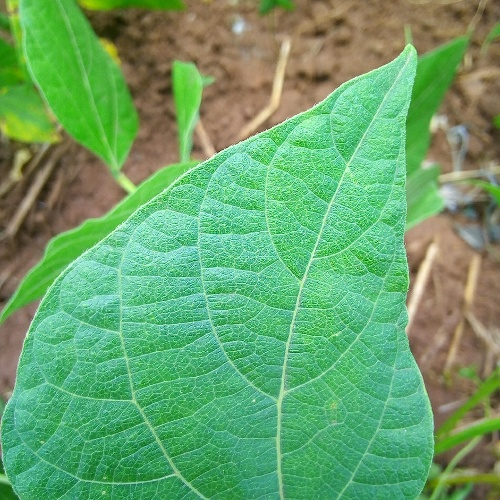

In [12]:
display(Image('beans/train/healthy/healthy_train.0.jpg'))

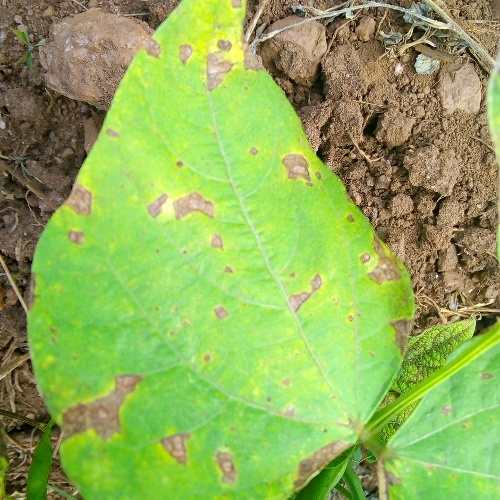

In [13]:
display(Image('beans/train/angular_leaf_spot/angular_leaf_spot_train.124.jpg'))

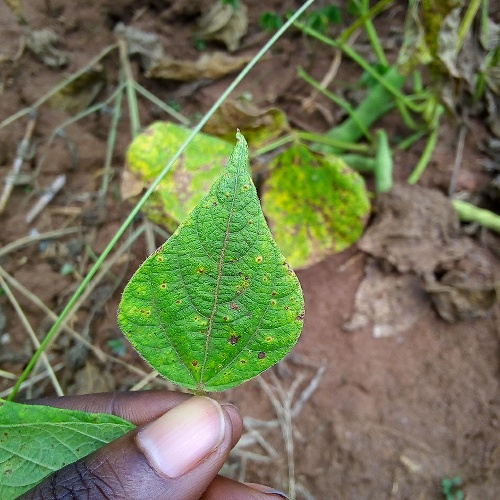

In [14]:
display(Image('beans/train/bean_rust/bean_rust_train.162.jpg'))

Setting up parameters

In [15]:
batch_size= 128
img_height = 224
img_width = 224

#Will be using MobileNetV2 model and hence seeting dim to 224*224

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/train',
                                                               seed=111,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size)

                                                          
                                                               

Found 1034 files belonging to 3 classes.


In [17]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/test',
                                                               seed=111,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size)

Found 128 files belonging to 3 classes.


In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/validation',
                                                               seed=111,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size)

Found 133 files belonging to 3 classes.


In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(128, 224, 224, 3)
(128,)


In [21]:
classes = train_ds.class_names
classes

['angular_leaf_spot', 'bean_rust', 'healthy']

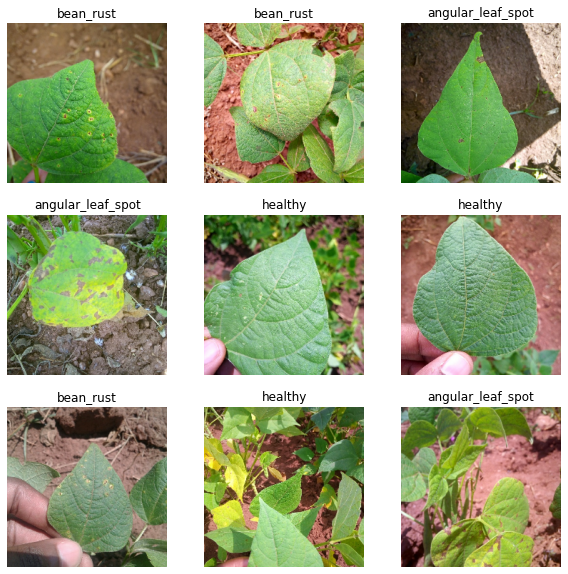

In [22]:
plt.figure(figsize=(10,10))
for image,labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis('off')

#take - 1 batch


In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#Autotune - Based on GPU and memory availability it autotunes
#We might want to prefetch the data in buffer for faster model training as we are using GPU
#Data is stored in cache and serialized to GPU based on buffer size

In [24]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [25]:
feature_extractor_layer = hub.KerasLayer(feature_extractor,input_shape = (img_height, img_width, 3))

In [26]:
feature_extractor_layer.trainable= False

In [28]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

#since tf 2.4 preprocessing is a part of model graph itself. In Prior versions we create a preprocessing function 
# and deploy the function.

In [31]:
tf.random.set_seed(111)

In [33]:
model = tf.keras.Sequential([
    normalization_layer,
    feature_extractor_layer,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')

])

In [34]:
model.compile(
    optimizer = 'adam',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


# Since we are not one hot encoding we are using sparsecategoricalcrosEntropy if not we would use crossEntropy

In [36]:
history = model.fit(train_ds, epochs=5, validation_data= val_ds)

Epoch 1/5
9/9 [==============================] - 34s 4s/step - loss: 0.5172 - accuracy: 0.7805 - val_loss: 0.4498 - val_accuracy: 0.7970
Epoch 2/5
9/9 [==============================] - 33s 4s/step - loss: 0.4727 - accuracy: 0.8046 - val_loss: 0.4174 - val_accuracy: 0.7895
Epoch 3/5
9/9 [==============================] - 34s 4s/step - loss: 0.4264 - accuracy: 0.8308 - val_loss: 0.3944 - val_accuracy: 0.8195
Epoch 4/5
9/9 [==============================] - 33s 4s/step - loss: 0.3906 - accuracy: 0.8414 - val_loss: 0.3700 - val_accuracy: 0.8571
Epoch 5/5
9/9 [==============================] - 35s 4s/step - loss: 0.3767 - accuracy: 0.8472 - val_loss: 0.3540 - val_accuracy: 0.8872


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


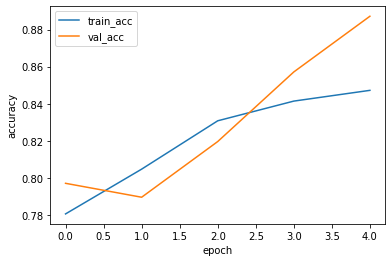

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'],loc='best')
plt.show()


In [39]:
result = model.evaluate(test_ds)

1/1 [==============================] - 8s 8s/step - loss: 0.3464 - accuracy: 0.8672


1/1 [==============================] - 0s 128ms/step


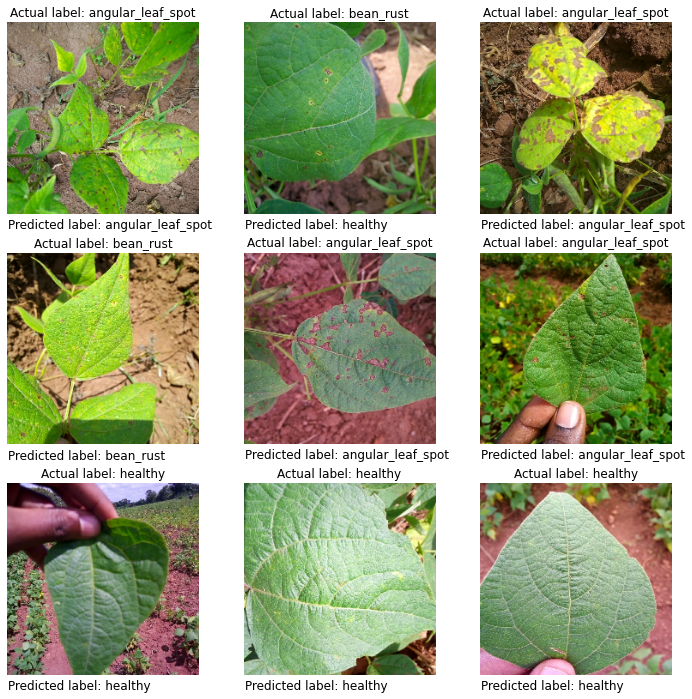

In [42]:
plt.figure(figsize=(12,12))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)

    img = tf.keras.preprocessing.image.img_to_array(images[i])
    img = np.expand_dims(img,axis=0)

    pred = model.predict(img)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title("Actual label: %s" % classes[labels[i]])
    plt.text(1,240,"Predicted label: %s" % classes[np.argmax(pred)],fontsize=12)

    plt.axis('off')
    

In [43]:
model.save('./models',save_format='tf')

In [44]:
!ls -alrt models

total 1888
drwxr-xr-x 1 root root    4096 Jan  1 00:10 ..
drwxr-xr-x 2 root root    4096 Jan  1 00:10 variables
drwxr-xr-x 2 root root    4096 Jan  1 00:10 assets
-rw-r--r-- 1 root root 1906532 Jan  1 00:10 saved_model.pb
-rw-r--r-- 1 root root    6938 Jan  1 00:10 keras_metadata.pb
drwxr-xr-x 4 root root    4096 Jan  1 00:10 .


In [45]:
model_loaded = tf.keras.models.load_model('./models/')

In [46]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
from PIL import Image
import numpy as np
from skimage import transform

def process(filename):
  np_image = Image.open(filename)
  np_image = np.array(np_image).astype('float32')
  np_image = transform.resize(np_image,(224,224,3))
  np_image = np.expand_dims(np_image,axis=0)
  return np_image

In [48]:
pred_label = model_loaded.predict(process('beans/train/healthy/healthy_train.0.jpg'))
print(classes[np.argmax(pred_label)])

1/1 [==============================] - 1s 664ms/step
healthy


In [49]:
pred_label

array([[0.00358995, 0.0649487 , 0.9314614 ]], dtype=float32)

In [50]:
!zip -r models.zip models/

  adding: models/ (stored 0%)
  adding: models/variables/ (stored 0%)
  adding: models/variables/variables.index (deflated 78%)
  adding: models/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: models/saved_model.pb (deflated 91%)
  adding: models/assets/ (stored 0%)
  adding: models/keras_metadata.pb (deflated 82%)


In [51]:
print(tf.__version__)

2.9.2
